__Andr$\acute{\text{e}}$ Zazzera (alz9cb), Annie Williams (maw3as), Hannah Frederick (hbf3k), Sean Grace (smg2mx)__

# Introduction:
In our present historical moment, analysis and understanding of election results and patterns is of crucial importance. It's a widely-spread talking point that voter turnout is trending downwards not only across the nation, but across the liberal world, as feelings of voter efficacy wane. Further complexifying this scenario are recent attempts by state and federal government offices to manipulate voter disenfranchisement to their own political ends, begging the question of analysis of registration data as well.  
Additionally, in 1996, Virginia implemented the [National Voter Registration ("Motor Voter") Act](https://www.justice.gov/crt/about-national-voter-registration-act), which allowed voter registration forms to be submitted through Department of Motor Vehicles offices and other designated agencies, or to be submitted by mail. This fundamentally simplified the issue of voter registration in Virginia, and we were interested to see if there was significant difference between pre- and post-1996 registration numbers. 
Because we all go to school at Virginia's flagship public institution of higher education, we felt it appropriate and of worth to investigate the possibility of some of these trends in our own Commonwealth.  
As a result, we agreed early on that we wanted to examine data from the Virginia Department of Elections, though in what form we would be examining the data was unclear. We hoped to be able to bring to light some interesting results and conclusions by our querying, that perhaps had gone unnoticed or unthought of in previous examinations of the data, as well as to hone our own webscraping, data cleaning and manipulation, analysis, and deductive skills.

# Description of the Data:
Our data are composed of three separate datasets that we scraped from three separate websites, all from resources publicly available on the [Virginia Department of Elections website](https://www.elections.virginia.gov/resultsreports/) and the [Department of Elections Historical Database](https://historical.elections.virginia.gov/). Our first dataset was of the Virginia Department of Elections Registration/Turnout Statistics for the November general elections, from 1976 to 2019. The Department of Elections only publishes these turnout statistics after the election is certified. We determined that this dataset has all of the acceptable properties we seek in data: it comes from a good source, it has a large scale, it is fairly clean, and it has many types of data. The variables included in this dataset are: 
\begin{itemize}
\item Year: the year of the election 
\item Total Registered: the number of registered voters in that election
\item Percentage Change From Previous Year: the percent change in registered voters from the previous election
\item Total Voting: the number of total voters that voted in that election
\item Voting Absentee (Included in Total Voting): the number of absentee voters in that election (included in the number of total voters)
\item Turnout (\% Voting of Total Registered): the turnout or percent of registered voters that voted in that election.
\end{itemize}
With these variables, we hoped to discover how voter turnout is trending generally because we planned to measure how the number of registered voters, the number of total voters, the number of absentee voters, and the percent voter turnout changed over time. 

Our next two datasets were of the Virginia Department of Elections Historical Elections Database for the presidential elections, from 1924 to 2016, and for the gubernatorial elections, from 1925 to 2017. The Department of Elections also publishes these electoral statistics after the election is certified. We determined that this dataset also has all of the acceptable properties we seek in data: it comes from a good source, it has a large scale, it is fairly clean, and it has many types of data. The variables included in this dataset are: 
\begin{itemize}
\item Year: the year of the election
\item Office: the office that the candidate was running for
\item Winner (VA): candidate's name
\item Party: candidate's party
\item Winner's Vote Count: the number of all votes cast for them
\item Winner's Percent of Total Votes: the percent of all votes cast for them 
\end{itemize}
With these variables, we hoped to discover how voter turnout is trending depending on if a Democratic candidate won the state or if a Republican candidate won the state. We also hoped to discovered how voter turnout is trending depending on if it takes place in a presidential election or if it takes place in a gubernatorial election. We planned to merge these two election datasets with the turnout dataset to measure how the number of registered voters, the number of total voters, the number of absentee voters, and the percent voter turnout changed over time by the candidate that won the state and by the election that took place. All of these web-scraped datasets required substantial cleaning, merging, and processing before the data could be used for analysis.

# Experimental Design:


## Web Scraping Process 

In order to collect the most up to date and trustworthy data, we decided to scrape the Virginia Department of Elections website. We wanted to learn more about the impact that voter registration has on Virginia election results - but data about voter registration and election results are on two completely different parts of the Virginia Department of Elections website.

Since the data we wanted was not readily downloadable from the site, we ultimately had to create three separate web scrapers. The first web scraper, voter_registration.py, collects data from the page with voter registration results, and outputs the data into voter_registration.csv. Next we scraped the results of Virginia presidential general elections from a different page with the file presidential_results.py - and again outputted the data into a csv file: presidential_results.csv. Copying the same logic from the presidential scraper, we scraped our final page, the results from Virginia gubernatorial elections. This scraper is located in governor_results.py and outputs to governor_results.csv. 

Originally, we did not plan to collect data about the gubernatorial elections. However, after reflection, we deemed it appropriate to find more data on results of the elections by the winning party, and felt we did not have enough information to analyze the impacts of voter turnout and election results. Since gubernatorial elections happen in years when no other elections happen, we felt that this was the best choice to learn more about each year’s winning party.

## Data Cleaning Process 

After scraping each page, we were left with three separate csv files. We used Pandas to combine our three csv files, and clean our final dataset. All data cleaning happens in the file data_cleaning.ipynb. 

We first read in each csv file, then cast the years to int types instead of float types, and then concatenated the presidential_results.csv and the governor_results.csv files, since both files contained the same column names. We then sorted the total election results by year, and removed the years prior to 1976 because we did not have voter registration data before that year.

In [4]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

#read in all three csv files as dataframes
voter_registration = pd.read_csv("scrapers/voter_registration.csv")
presidential_results = pd.read_csv("scrapers/presidential_results.csv")
governor_results = pd.read_csv("scrapers/governor_results.csv")

# cast year to integer in all three dataframes
voter_registration["Year"] = voter_registration["Year"].astype(int)
presidential_results["Year"] = presidential_results["Year"].astype(int)
governor_results["Year"] = governor_results["Year"].astype(int)

# concatanate the presidential results with the governor results
combined_elections = pd.concat([presidential_results, governor_results], axis=0)
combined_elections.head()

# sort dataframe based on year
combined_elections.sort_values(by="Year", ascending=False, inplace=True)
combined_elections.head()
# drop the last rows
combined_elections = combined_elections[combined_elections["Year"] >= 1976]
combined_elections.head()

,Year,Office,Winner (VA),Party,Winner's Vote Count,Winner's Percent of Total Votes
0,2017,Governor,Ralph Shearer Northam,Democratic,1408818,0.539
0,2016,President,Hillary R. Clinton,Democratic,1981473,0.497
1,2013,Governor,Terence Richard McAuliffe,Democratic,1069789,0.477
1,2012,President,Barack Obama,Democratic,1971820,0.511
2,2009,Governor,Robert F. McDonnell,Republican,1163651,0.586


Next, we needed to combine the data frame which held the results of both elections with the data frame containing the voter registration information. We used the Pandas merge function to do an outer join on the year column of the voter registration dataset and the election results dataset. Selecting an outer join produced a new data frame containing a union of the columns that appear in each original dataset. This final data frame, containing both voter turnout and election results, was saved to the file complete_cleaned.csv.

While typically the prevalence of 'NaN' elements in the resulting data frame would be cause for further cleaning operations, in this situation, we actually decided it was more important to keep all of these rows, because their data would allow us to paint a more complete and robust picture regarding overall trends in the state of Virginia.

In [5]:
# specify outer join with how='outer'
df_merge_col = pd.merge(voter_registration, combined_elections, on='Year', how='outer')
df_merge_col.head()

# output csv
# index=False hides index column, sep="," separates at commas
# df_merge_col.to_csv("complete_cleaned.csv", index=False, sep=",")

,Year,Total Registered,Percentage Change from Previous Year,Total Voting,Turnout (% Voting of Total Registered),Voting Absentee (Included in Total Voting),Office,Winner (VA),Party,Winner's Vote Count,Winner's Percent of Total Votes
0,2019,5628035.0,-0.0100,2383646.0,0.4240,144360.0,NaN,NaN,NaN,NaN,NaN
1,2018,5666962.0,0.0331,3374382.0,0.5950,337315.0,NaN,NaN,NaN,NaN,NaN
2,2017,5489530.0,-0.0073,2612309.0,0.4760,192397.0,Governor,Ralph Shearer Northam,Democratic,1408818.0,0.539
3,2016,5529742.0,0.0641,3984631.0,0.7205,566948.0,President,Hillary R. Clinton,Democratic,1981473.0,0.497
4,2015,5196436.0,-0.0160,1509864.0,0.2910,62605.0,NaN,NaN,NaN,NaN,NaN


## Data Querying Process
First, we calculated the summary statistics for our complete dataset with all elections, as this let us see the general distributions of all the variables.

In [6]:
# convert our csv file back to a data frame
voting_data = pd.read_csv("complete_cleaned.csv")
#find the summary statistics for our dataframe of all elections
summ_stats = voting_data.describe()
summ_stats

,Year,Total Registered,Percentage Change from Previous Year,Total Voting,Turnout (% Voting of Total Registered),Voting Absentee (Included in Total Voting),Winner's Vote Count,Winner's Percent of Total Votes
count,44.000000,4.400000e+01,43.000000,4.400000e+01,44.000000,40.000000,2.200000e+01,22.000000
mean,1997.500000,3.722293e+06,0.023912,1.972992e+06,0.549952,115376.250000,1.208788e+06,0.531364
std,12.845233,1.218187e+06,0.046548,7.537008e+05,0.160630,130425.526595,3.952506e+05,0.042467
min,1976.000000,2.022619e+06,-0.049000,1.059158e+06,0.286100,10686.000000,6.993020e+05,0.450000
25%,1986.750000,2.671084e+06,-0.004150,1.374276e+06,0.429250,35022.750000,9.728408e+05,0.504250
50%,1997.500000,3.645190e+06,0.013000,1.819510e+06,0.524500,69293.500000,1.104070e+06,0.528000
75%,2008.250000,4.974848e+06,0.053000,2.285975e+06,0.677250,121824.500000,1.390883e+06,0.556500
max,2019.000000,5.666962e+06,0.148000,3.984631e+06,0.837000,566948.000000,1.981473e+06,0.623000


Then, we calculated the summary statistics for our dataset grouped by whether a Democratic candidate won the election or a Republican candidate won the election, and this let us see more interesting relationships among the variables.

In [7]:
#make a dataframe of elections where a democrat won virginia
democratic_data = voting_data.loc[voting_data['Party'] == 'Democratic']
#find the summary statistics for this dataframe of democratic elections
democratic_stats = democratic_data.describe()

In [8]:
#make a dataframe of elections where a republican won virginia
republican_data = voting_data.loc[voting_data['Party'] == 'Republican']
#find the summary statistics for this dataframe of republican elections
republican_stats = republican_data.describe()

#make and describe a dataframe of elections grouped by party
#grouped_stats = voting_data.groupby('Party').describe()
#grouped_stats

Next, we calculated the summary statistics for our dataset grouped by whether a presidential election took place or a gubernatorial election took place, and this also let us see more interesting relationships among the variables. 

In [9]:
#make a dataframe with only presidential elections
president_data = voting_data.loc[voting_data['Office'] == 'President']
#find the summary statistics for this dataframe of presidential elections
president_stats = president_data.describe()

In [10]:
#make a dataframe with only gubernatorial elections
governor_data = voting_data.loc[voting_data['Office'] == 'Governor']
#find the summary statistics for this dataframe of gubernatorial elections
governor_stats = governor_data.describe()

#make and describe a dataframe of elections grouped by type
#grouped_stats = voting_data.groupby('Office').describe()
#grouped_stats

Then, we calculated the summary statistics for our dataset grouped by whether the election took place before or after the Virginia Motor Voter Act was passed, and this let us see more interesting relationships among the variables.

In [11]:
#make a dataframe of elections before the motor voter act
pre_motor_voter = voting_data.loc[voting_data['Year'] < 1996]
#find the summary statistics for this dataframe pre-motor voter
pre_motor_voter_stats = pre_motor_voter.describe()

In [12]:
#make a dataframe of elections after the motor voter act
post_motor_voter = voting_data.loc[voting_data['Year'] >= 1996]
#find the summary statistics for this dataframe post-motor voter
post_motor_voter_stats = post_motor_voter.describe()

We also calculated the percent change in the number of total voters from one year to the next year for only gubernatorial elections.

In [13]:
#find the percent changes in number of voters from one gubernatorial election to the next gubernatorial election
governor_data["Change in Total Voting"] = (governor_data["Total Voting"] / governor_data["Total Voting"].shift(-1)) -1

#find the least percent change in number of voters from one gubernatorial election to the next gubernatorial election
least_perc_change = abs(governor_data["Change in Total Voting"]).min()
least_perc_change_years = governor_data[governor_data["Change in Total Voting"] == least_perc_change]

In [14]:
#find the most percent decrease in number of voters from one gubernatorial election to the next gubernatorial election
most_per_decrease = governor_data["Change in Total Voting"].min()
most_per_decrease_years = governor_data[governor_data["Change in Total Voting"] == most_per_decrease]

In [15]:
#find the most percent change in number of voters from one gubernatorial election to the next gubernatorial election
most_perc_change = abs(governor_data["Change in Total Voting"]).max()
most_perc_change_years = governor_data[governor_data["Change in Total Voting"] == most_perc_change]

# Beyond Original Specifications:
In order to exceed the baseline expectations for this project, our group chose to web scrape three different datasets and perform extra manipulating, cleaning, and merging to make our datasets functional. We expanded on this point in detail in our previous sections.

Furthermore, we designed a function, va_elect, which would allow a user to input any year in which there was a presidential election (from 1976-2019) and check to see if Virginia voted for the eventual winner of the national general election. This was done by querying the data set against a dictionary of national election winners.

In [20]:
# Did VA elect the winning candidate in any given year?
## establish dict of presidential election years and winners
pres_winners = {'1976':'Jimmy Carter', '1980':'Ronald W. Reagan', '1984':'Ronald W. Reagan',
                '1988':'George H. Bush', '1992': 'Bill Clinton', '1996': 'Bill Clinton',
                '2000': 'Bush and Cheney', '2004':'Bush and Cheney', '2008': 'Barack Obama',
                '2012': 'Barack Obama', '2016': 'Donald Trump'}
## define function to:
## take an election year
## check data against pres_winners dict
## return a boolean
def va_elect(year):
    return pres_winners[year] == president_data.loc[president_data.Year == int(year), 'Winner (VA)'].values[0]

# user inputs a presidential election year to see in Virginia results aligned with the nation's results
check_year = input('Please enter a presidential election year: ')
try:
    print('Did Virginia results align with the nation in this election? ' + str(va_elect(check_year)))
except KeyError:
    print('You did not enter a presidential election year.')

Please enter a presidential election year: 1988
Did Virginia results align with the nation in this election? True


Lastly, we also performed some statistical hypothesis testing, to be able to confidently affirm or reject our suspicions about the impact of presidential elections on turnout, as well as of the Motor Voter Act on registration. This required and allowed us to explore statistical computing packages in Python, an essential skill in our repertoire.

In [21]:
from scipy import stats
# set up statistical test for significant difference in turnout between presidential and non-presidential election years
nonpres_years = voting_data.loc[voting_data['Year']%4!=0]
# 2 tailed t-test to see if this is a significant difference in means
stats.ttest_ind(president_data['Turnout (% Voting of Total Registered)'], nonpres_years['Turnout (% Voting of Total Registered)'], equal_var=False)
print('The p-value of the two-tailed t-test is very low, indicating that there is a significant difference in the mean turnout in presidential election years versus non-presidential election years.')

# statistical test on significance of Motor Voter Act in 1996
premotor = voting_data.loc[voting_data['Year'] < 1996]
postmotor = voting_data.loc[voting_data['Year'] >= 1996]
# 2 tailed t-test to see if this is a significant difference in means
stats.ttest_ind(premotor['Total Registered'], postmotor['Total Registered'], equal_var=False)
print('The p-value of the two-tailed t-test is very low, indicating that there is a significant difference in the total number of registered voters before and after the implementation of the Motor Voter Act in 1996.')

The p-value of the two-tailed t-test is very low, indicating that there is a significant difference in the mean turnout in presidential election years versus non-presidential election years.
The p-value of the two-tailed t-test is very low, indicating that there is a significant difference in the total number of registered voters before and after the implementation of the Motor Voter Act in 1996.


# Results: 

First we examine the outputs of some of the earlier queries.

In [18]:
#did not display the table so our report would be under 20 pages
#democratic_stats

In [19]:
#did not display the table so our report would be under 20 pages
#republican_stats

If you display the tables, it could be seen that the number of registered voters was generally higher when a Democratic candidate won the election than when a Republican candidate won the election. This was also the case for the number of total voters who voted and for the number of absentee voters who voted, but the voter turnout was generally higher when a Republican candidate won the election than when a Democratic candidate won the election.

In [22]:
#did not display the table so our report would be under 20 pages
#president_stats

In [23]:
#did not display the table so our report would be under 20 pages
#governor_stats

If you display the tables, it could be seen that the number of total voters who voted was generally higher when a presidential election took place than when a gubernatorial election took place. This was also the case for the voter turnout and for the number of absentee voters who voted, but the number of registered voters was about the same when a presidential election took place as when a gubernatorial election took place.

In [24]:
#did not display the table so our report would be under 20 pages
pre_motor_voter_stats

,Year,Total Registered,Percentage Change from Previous Year,Total Voting,Turnout (% Voting of Total Registered),Voting Absentee (Included in Total Voting),Winner's Vote Count,Winner's Percent of Total Votes
count,20.00000,2.000000e+01,19.000000,2.000000e+01,20.000000,16.000000,1.000000e+01,10.000000
mean,1985.50000,2.553199e+06,0.020474,1.610476e+06,0.630295,57691.500000,9.766272e+05,0.542400
std,5.91608,3.588868e+05,0.056057,4.153958e+05,0.128214,36921.335496,2.310835e+05,0.051975
min,1976.00000,2.022619e+06,-0.049000,1.059158e+06,0.427000,22589.000000,6.993020e+05,0.450000
25%,1980.75000,2.229240e+06,-0.013500,1.263649e+06,0.520625,30430.500000,7.794062e+05,0.509000
50%,1985.50000,2.633555e+06,0.009000,1.512869e+06,0.622250,42145.000000,9.432725e+05,0.543500
75%,1990.25000,2.813096e+06,0.032000,1.836344e+06,0.713750,82429.750000,1.124218e+06,0.577000
max,1995.00000,3.055486e+06,0.148000,2.558665e+06,0.837000,141123.000000,1.337078e+06,0.623000


In [25]:
#did not display the table so our report would be under 20 pages
post_motor_voter_stats

,Year,Total Registered,Percentage Change from Previous Year,Total Voting,Turnout (% Voting of Total Registered),Voting Absentee (Included in Total Voting),Winner's Vote Count,Winner's Percent of Total Votes
count,24.000000,2.400000e+01,24.000000,2.400000e+01,24.000000,24.000000,1.200000e+01,12.000000
mean,2007.500000,4.696537e+06,0.026633,2.275088e+06,0.483000,153832.750000,1.402255e+06,0.522167
std,7.071068,6.993378e+05,0.038469,8.426050e+05,0.156103,155233.342278,4.058601e+05,0.032090
min,1996.000000,3.322740e+06,-0.035000,1.229139e+06,0.286100,10686.000000,9.690620e+05,0.471000
25%,2001.750000,4.190202e+06,-0.002575,1.498338e+06,0.353250,51150.750000,1.058827e+06,0.507500
50%,2007.500000,4.755216e+06,0.019900,2.204424e+06,0.444650,111747.000000,1.286234e+06,0.523500
75%,2013.250000,5.250467e+06,0.061775,2.644094e+06,0.614250,160909.750000,1.777602e+06,0.537500
max,2019.000000,5.666962e+06,0.107000,3.984631e+06,0.740000,566948.000000,1.981473e+06,0.586000


If you display the tables, it could be seen that the number of registered voters was significantly higher after the Motor Voter Act than before the Motor Voter Act. This was also the case for the number of total voters who voted and for the number of absentee voters who voted, but the voter turnout was significantly higher before the Motor Voter Act than after the Motor Voter Act.

In [28]:
least_perc_change_years['Year'].values[0]

2009

In [29]:
most_per_decrease_years['Year'].values[0]

1985

In [30]:
most_perc_change_years['Year'].values[0]

1989

For only gubernatorial elections, we discovered that the smallest percent change occurred in 2009, the greatest percent decrease occurred in 1985, and the greatest percent change occurred in 1989.

Looking at the output, the percent change in gubernatorial election turnout in 1989 may not seem immediately noteworthy. However, after doing some research on the winner of this election (Douglas Wilder) it became more clear why this election might have seen such a dramatic increase in the number of voters compared to the previous election. Douglas Wilder was not only the first black governor in the state of Virginia, but the first black person elected governor in the history of the United States of America.

## Graphical Analysis

Our graphical analysis provided a great deal of interesting insight into trends in Virginia voting, the effects of laws passed, and the significance of historical events. One of the most general questions we wanted to answer was how has voting in the state of Virginia changed over the years in terms of its political values. Our graph, visualizing total number of votes cast plotted against year for presidential and gubernatorial elections and colored by party of winner, does a good job of demonstrating these changes.

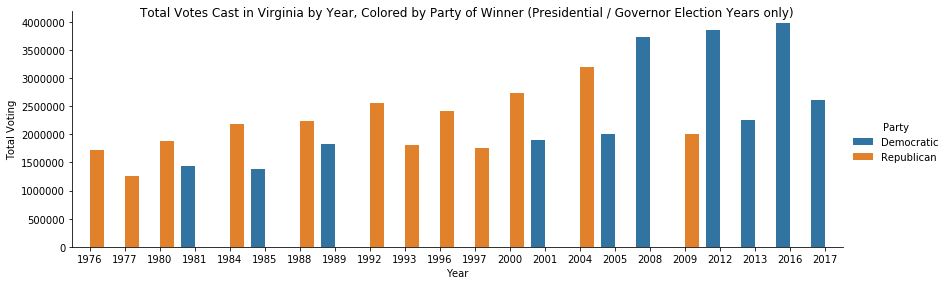

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

#make a bar plot of total virgina voters in presidential and gubernatorial elections by which party won
#make a dataframe with presidential and gubernatorial elections
gov_and_pres = voting_data[pd.notnull(voting_data["Party"])]
gov_and_pres_plot = sns.catplot(x="Year", y = "Total Voting", data = gov_and_pres, hue = "Party", kind = "bar", height = 4, aspect = 3) #make a plot
gov_and_pres_plot.fig.suptitle("Total Votes Cast in Virginia by Year, Colored by Party of Winner (Presidential / Governor Election Years only)") #add the title
plt.show()

Looking at the graph, from 1976 to 2004 spanning 15 presidential and gubernatorial elections, Democrats only won 4 of those races. Conversely, from 2005 to 2017, across 7 elections the Democrats won 6 races. This is a seismic shift, and one that has implications not just in the state of Virginia, but nationally. Virginia has 13 electoral votes which have gone from consistently being awarded to the Republican candidate to consistently going to the Democratic candidate. The reason for this shift appears to be closely related to expasion of suburbs of the DC metro area into Northern Virginia, and rising populations in other urban centers like Richmond. 

Our group was also curious about the effects of a law called the Motor Voter Act. This federal law's purpose was essentially to make it easier for Americans to register to vote, as well as to maintain their status as a registered voter. Thus, we visualized the number of registered voters in Virginia colored by whether or not the data were before or after the passing of the Motor Voter Act, in order to observe any changes.

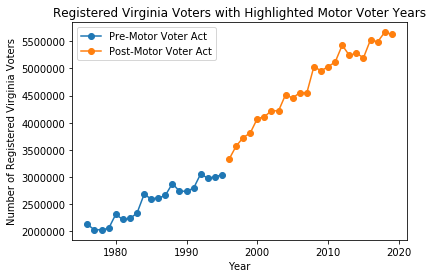

In [32]:
#make a dataframe of elections before the motor voter act
pre_motor_voter = voting_data.loc[voting_data['Year'] < 1996]
#make a dataframe of elections after the motor voter act
post_motor_voter = voting_data.loc[voting_data['Year'] >= 1996]
#make and save a line plot of the total voters registered pre and post motor voter
plt.plot("Year", "Total Registered", data=pre_motor_voter, marker='o') #make a plot of pre-motor voter elections
year_total_registered_motor = plt.plot("Year", "Total Registered", data=post_motor_voter, marker='o') #make a plot of post-motor voter elections
plt.title('Registered Virginia Voters with Highlighted Motor Voter Years') #add the title
plt.xlabel('Year') #add the x-axis label
plt.ylabel('Number of Registered Virginia Voters') #add the y-axis label
plt.legend(labels=['Pre-Motor Voter Act', 'Post-Motor Voter Act']) #add the legend
plt.show()

From this graph, we have further evidence to support the conclusion that the Motor Voter Act played a significant role in number of Virginians who were registered to vote each year. We can see that the general slope of the points prior to and after the passing of the law are significantly different, showing that in Virginia the Motor Voter Act succeded in its goal of increasing the number of people registered to vote. 

We were also curious about overall changes in voter turnout over time. A lot has been made about the fact that Americans tend to be less politically involved in recent years, and we wanted to see if that was reflected in the state of Virginia. To examine this, we plotted voter turnout against year, colored by the type of election.

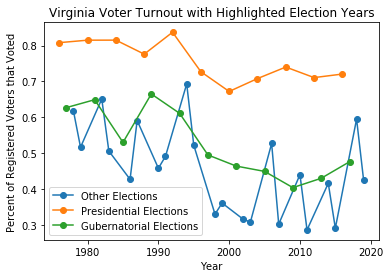

In [34]:
#make a dataframe with all non-presidential and non-gubernatorial elections
other_years = voting_data.loc[(voting_data['Year']%4==2) | (voting_data['Year']%4==3)]
#make and save a line plot of the voter turnout with highlighted election years
plt.plot("Year", "Turnout (% Voting of Total Registered)", data=other_years, marker='o') #make the plot of other elections
plt.plot("Year", "Turnout (% Voting of Total Registered)", data=president_data, marker='o') #make the plot of pres elections
year_voter_turnout_highlighted = plt.plot("Year", "Turnout (% Voting of Total Registered)", data=governor_data, marker='o') #make the plot of gov elections
plt.title('Virginia Voter Turnout with Highlighted Election Years') #add the title
plt.xlabel('Year') #add the x-axis label
plt.ylabel('Percent of Registered Voters that Voted') #add the y-axis label
plt.legend(labels=['Other Elections', 'Presidential Elections', 'Gubernatorial Elections']) #add the legend
plt.show()

First, as expected, presidential elections tend to have higher voter turnout than all other election years. However, one aspect that is noteworthy is how voter turnout has dropped overall across all three categories of elections, yet presidential elections appear to be the least affected. For the other two election types, the first year for each has a voter turnout rate of above 60 percent. Voter turnout in gubernatorial elections has fairly steadily declined since then, with a low point of turnout in the low 40s in 2009. Years without a presidential election or a gubernatorial election have seen an even more striking decline, with several points in the low 30s and even a couple below 30 percent. It appears as though gubernatorial and other elections have seen a slight uptick in voter turnout in recent years, while presidential election turnout appears to have leveled off after dropping in the 1990s.  

Given the current pandemic, and the potential ramifications it could have on the election, we wanted to examine rates of absentee voting in Virginia.

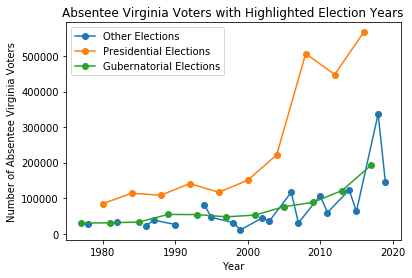

In [35]:
#make and save a line plot of the total absentee voters with highlighted election years
plt.plot("Year", "Voting Absentee (Included in Total Voting)", data=other_years, marker='o') #make the plot of other elections
plt.plot("Year", "Voting Absentee (Included in Total Voting)", data=president_data, marker='o') #make the plot of pres elections
year_total_absentee_highlighted = plt.plot("Year", "Voting Absentee (Included in Total Voting)", data=governor_data, marker='o') #make the plot of gov elections
plt.title('Absentee Virginia Voters with Highlighted Election Years') #add the title
plt.xlabel('Year') #add the x-axis label
plt.ylabel('Number of Absentee Virginia Voters') #add the y-axis label
plt.legend(labels=['Other Elections', 'Presidential Elections', 'Gubernatorial Elections']) #add the legend
plt.show()

Interestingly, in spite of the fact that overall rates in voter turnout are down, the number of absentee voters has been increasing significantly. Presidential years in particular have seen an exponential spike going from just over 100,000 votes in 2000 to over 500,000 votes in 2016.
Discontinuities in the line graph represent years in which there was no absentee voter data available.

# Testing: 

In TestWebScraper.py, we ran nine unit tests specifically on our web-scraping process in voter_registration.py, presidential_results.py, and governor_results.py. The voter_registration.py web-scraper converted the data from strings to floats as they were read in, so we needed to test that our methods converted these types correctly. The only_numerics method takes in a string representation of a number, strips any non-numeric characters from that string, and returns a float. All of these numbers had commas (,) so we needed to remove these commas if we wanted to cast this string to a float. To make sure that this method correctly converts all string representations to float representations, we ran unit tests on all possible equivalence classes of string representations in this dataset. For example, test_does_only_numerics_work_with_numeric_strings tests if only_numerics('1,000,000') is equal to 1000000.0.

The percentages method takes in a string representation of a percentage, strips any non-numeric characters (other than the negative sign since percentages can be negative), and returns the float representation of that percentage. All of these percentages had periods (.) and percent signs (%), and some of the percentages had empty spaces (' ') and asterisks (\*), so we needed to remove these characters if we wanted to cast these strings to floats. To make sure that this method correctly converts all string representations to float representations, we ran unit tests on all possible equivalence classes of string representations in this dataset. For example, test_does_percentages_work_with_negative_nonnumeric_strings tests if percentages('-10.0\*\*%') is equal to -0.1.

We also wrote three tests to check the requests to the websites that we scraped. Each file that scrapes a web page makes a request to a unique page on the Virginia Department of Elections website. The last three tests in our TestWebScraper.py file check that the request to each website returns a 200 status code. Status codes are a way that websites communicate whether or not they successfully completed a request. The 200 status code means that the request was received and understood, and is being processed. This test helps us check that we wrote our requests correctly, and that the pages we scraped still exist. Below are two examples of our string to float tests and one example of our scraper request tests.

In [36]:
def test_does_only_numerics_work_with_numeric_strings(self):
        string_num = '1,000,000' #declare the string of numbers to convert to a float of that number
        print("Is " + string_num + " converted to and returned as " + str(only_numerics(string_num)) + "?")
        self.assertEqual(only_numerics(string_num), 1000000.0)

In [37]:
def test_does_percentages_work_with_negative_nonnumeric_strings(self):
        string_num = '-10.0%**' #declare the string of numbers and characters to convert to a float of that percent
        print("Is " + string_num + " converted to and returned as " + str(percentages(string_num)) + "?")
        self.assertEqual(percentages(string_num), -0.1)

In [38]:
def test_voter_registration_scraper_request(self):
    url = "https://www.elections.virginia.gov/resultsreports/registrationturnout-statistics/"
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    print("Voter registration site status code:",response.status_code)
    self.assertEqual(response.status_code, 200)

In [39]:
#import and run our unit tests from TestWebScraper.py
from TestWebScraper import *
unittest.main(argv=[''], verbosity=2, exit=False)

test_does_only_numerics_work_with_nonnumeric_strings (TestWebScraper.TestWebScraper) ... ok
test_does_only_numerics_work_with_numeric_strings (TestWebScraper.TestWebScraper) ... ok
test_does_percentages_work_with_negative_nonnumeric_strings (TestWebScraper.TestWebScraper) ... ok
test_does_percentages_work_with_negative_numeric_strings (TestWebScraper.TestWebScraper) ... ok
test_does_percentages_work_with_positive_nonnumeric_strings (TestWebScraper.TestWebScraper) ... ok
test_does_percentages_work_with_positive_numeric_strings (TestWebScraper.TestWebScraper) ... ok
test_gubernatorial_election_scraper_request (TestWebScraper.TestWebScraper) ... 

Is 1,000,000*** converted to and returned as 1000000.0?
Is 1,000,000 converted to and returned as 1000000.0?
Is -10.0%** converted to and returned as -0.1?
Is -10.0% converted to and returned as -0.1?
Is 10.0%** converted to and returned as 0.1?
Is 10.0% converted to and returned as 0.1?


ok
test_presidential_election_scraper_request (TestWebScraper.TestWebScraper) ... ok
test_voter_registration_scraper_request (TestWebScraper.TestWebScraper) ... 

Gubernatorial election site status code: 200
Presidential election site status code: 200
Voter registration site status code: 200


ok

----------------------------------------------------------------------
Ran 9 tests in 0.588s

OK


# Conclusions:

As a result of our testing and querying, we’ve been able to determine that voter registration in Virginia has been rapidly rising over the past few decades, and also that conventional wisdom about voter participation in elections may not be inaccurate. To the first point, we see both graphically and statistically that the implementation of the National Voter Registration Act in 1996 had a significant impact on enabling more Virginians to register to vote. This indicates to us that policy designed to facilitate voter registration is useful and effective. With recent conversations surrounding the proposal for automatic voter registration, this conclusion is vital.
To the latter, there is evidence of a significant difference in voter turnout between presidential election years and other years. Furthermore, we see graphically that turnout in presidential elections is decreasing in Virginia, while turnout in other types of elections has shown even more depreciation. In politically active circles, it's a fairly widely-heard assertion that "when voters turn out, Democrats win". In our data, we see that indeed, when more votes are cast, Democrats do tend to win in Virginia. However, when voter registration is lower, but turnout as a proportion of registration is high, Republicans tend to win. This indicates to us that the Republican base is more ideologically committed to coming out to vote for their candidates, or perhaps have fewer barriers to actively participating in the election process. A valuable extension to this project would be to take such ideological and material concerns into consideration, and finding ways to model them. We also see that absentee voting has been on the rise recently, while elections have continued to be deemed safe, secure, and legitimate, indicating that absentee voting is a safe part of our democratic process---a relevant and important conclusion, considering the ways in which the Coronavirus pandemic is going to affect our elections in November of this year. Further examination of voter and turnout trends in the broader Southern US would be of tremendous value, since trends have shown Virginia becoming more liberal as more total voters are involved in the political process, but these trends may or may not generalize throughout the South. Additionally, extension to analysis of the nation as a whole would be crucial.